# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer

In [ ]:
file_path = "/content/processed.cleveland.data"

In [ ]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# **Load Dataset**

In [ ]:
df = pd.read_csv(file_path, header=None, names=column_names)

# **EDA**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
df.describe(include='object')

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
print("Unique values in 'ca':")
print(df['ca'].unique())

print("\nUnique values in 'thal':")
print(df['thal'].unique())

Unique values in 'ca':
['0.0' '3.0' '2.0' '1.0' '?']

Unique values in 'thal':
['6.0' '3.0' '7.0' '?']


In [ ]:
df[['thal', 'ca']] = df[['thal', 'ca']].replace('?',np.nan)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Handle mising values "Imputation"**

In [ ]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [ ]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

/tmp/ipython-input-2843839907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
/tmp/ipython-input-2843839907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Encoding**

In [ ]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,False,...,False,False,True,False,True,True,False,False,False,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2,False,...,True,False,True,True,False,False,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,False,...,True,False,True,True,False,False,True,False,True,False
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,True,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
print(df['num'].value_counts())

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [ ]:
df['num'] = df['num'].apply(lambda x: 1 if int(x) > 0 else 0)

print("after convert to binary")
print(df['num'].value_counts())
print((df['num'].value_counts(normalize=True) * 100).round(2))


after convert to binary
num
0    164
1    139
Name: count, dtype: int64
num
0    54.13
1    45.87
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   trestbps     303 non-null    float64
 3   chol         303 non-null    float64
 4   fbs          303 non-null    float64
 5   thalach      303 non-null    float64
 6   exang        303 non-null    float64
 7   oldpeak      303 non-null    float64
 8   num          303 non-null    int64  
 9   cp_2.0       303 non-null    bool   
 10  cp_3.0       303 non-null    bool   
 11  cp_4.0       303 non-null    bool   
 12  restecg_1.0  303 non-null    bool   
 13  restecg_2.0  303 non-null    bool   
 14  slope_2.0    303 non-null    bool   
 15  slope_3.0    303 non-null    bool   
 16  thal_6.0     303 non-null    bool   
 17  thal_7.0     303 non-null    bool   
 18  ca_1.0       303 non-null    bool   
 19  ca_2.0  

# **Scaling**

In [ ]:
X = df.drop("num", axis=1)
y = df["num"]

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,-0.444554,-0.629534,-0.951662,-0.115663,1.023375,-0.926766,3.664502,3.979112,-0.793116,-0.522599,-0.378677,-0.265841
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,-0.444554,-0.629534,1.050793,-0.115663,1.023375,1.079021,-0.272888,-0.251312,-0.793116,-0.522599,-0.378677,3.761649
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,-0.444554,-0.629534,1.050793,-0.115663,1.023375,1.079021,-0.272888,-0.251312,1.260850,-0.522599,2.640773,-0.265841
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,-0.444554,1.588476,-0.951662,-0.115663,-0.977158,-0.926766,3.664502,-0.251312,-0.793116,-0.522599,-0.378677,-0.265841
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,2.249444,-0.629534,-0.951662,-0.115663,1.023375,-0.926766,-0.272888,-0.251312,-0.793116,-0.522599,-0.378677,-0.265841


# **EDA**

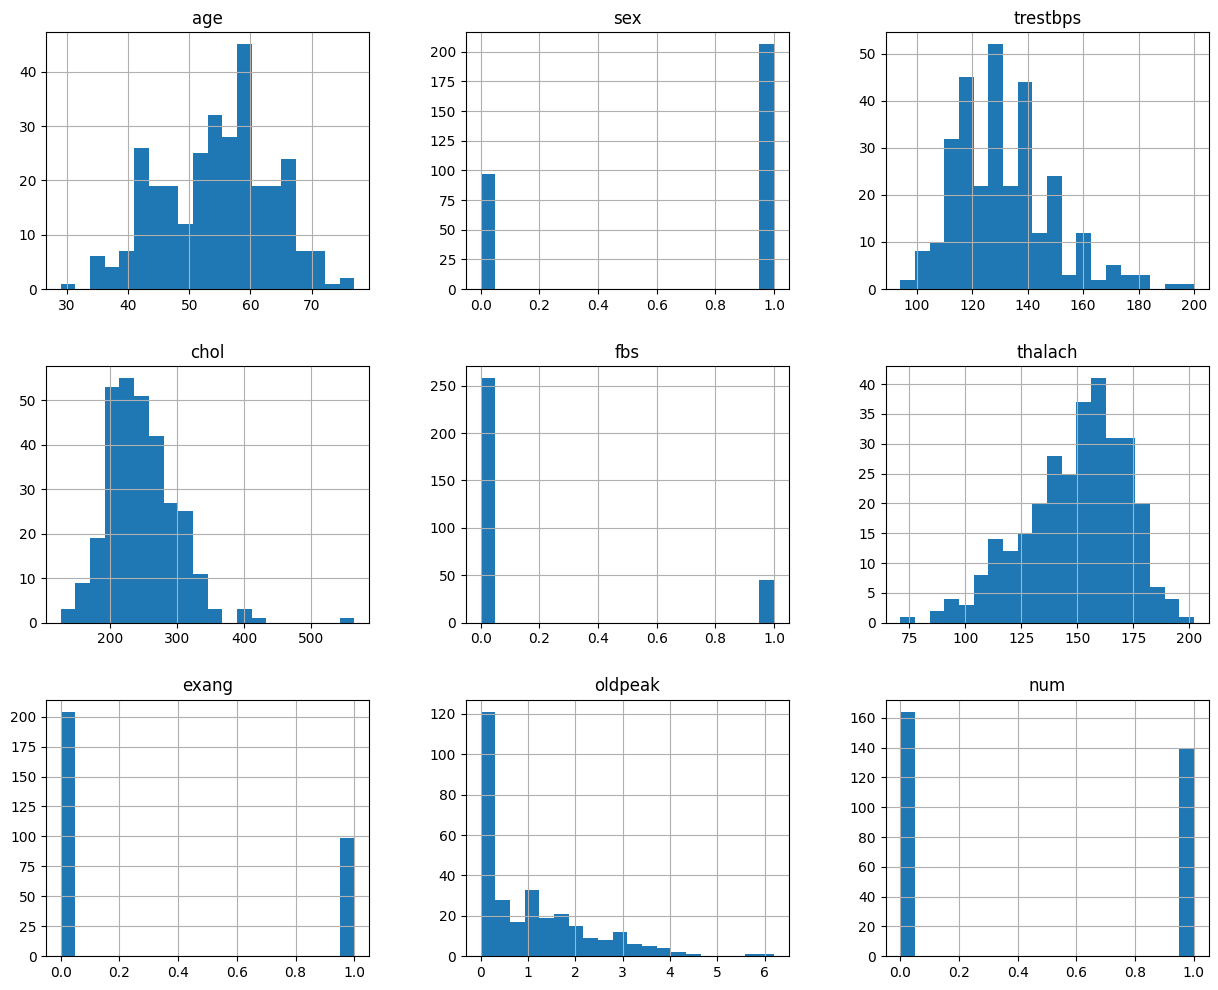

In [ ]:
df.hist(figsize=(15, 12), bins=20)
plt.show()

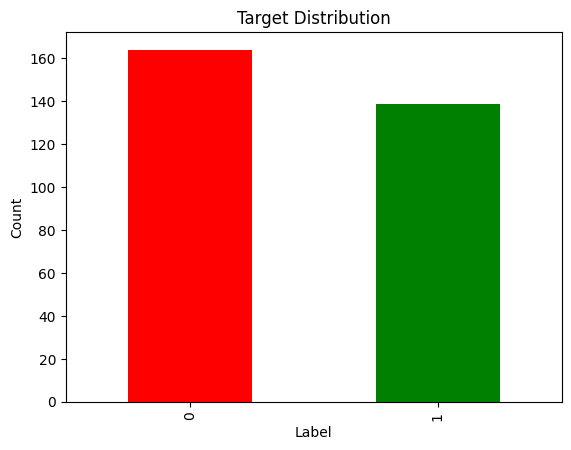

In [ ]:
# Distribution of Target
df['num'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Target Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

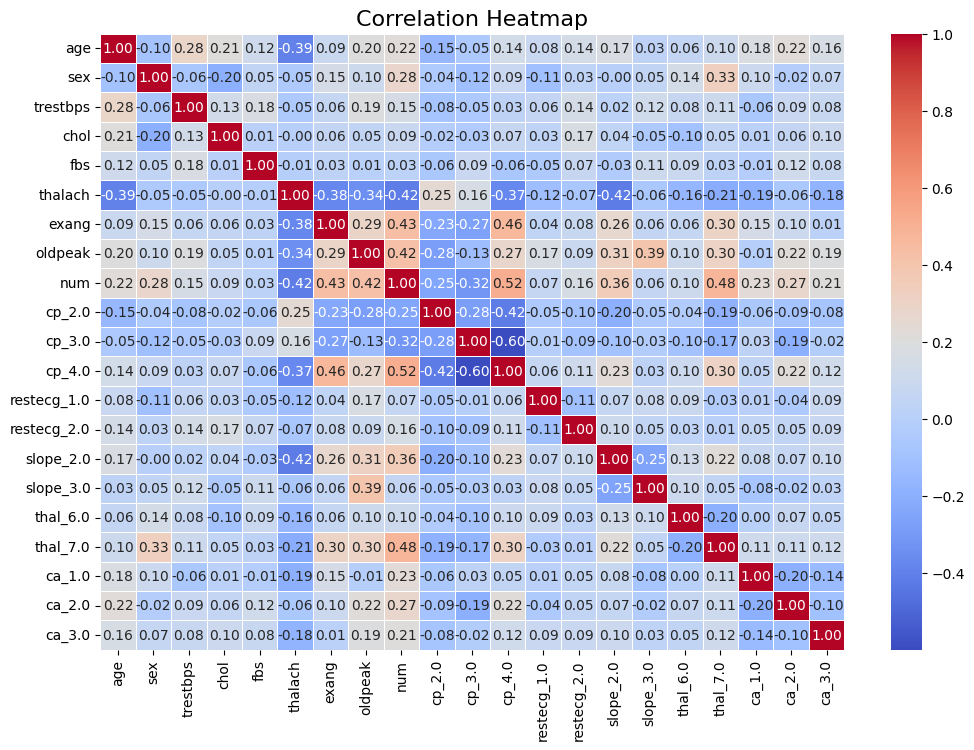

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

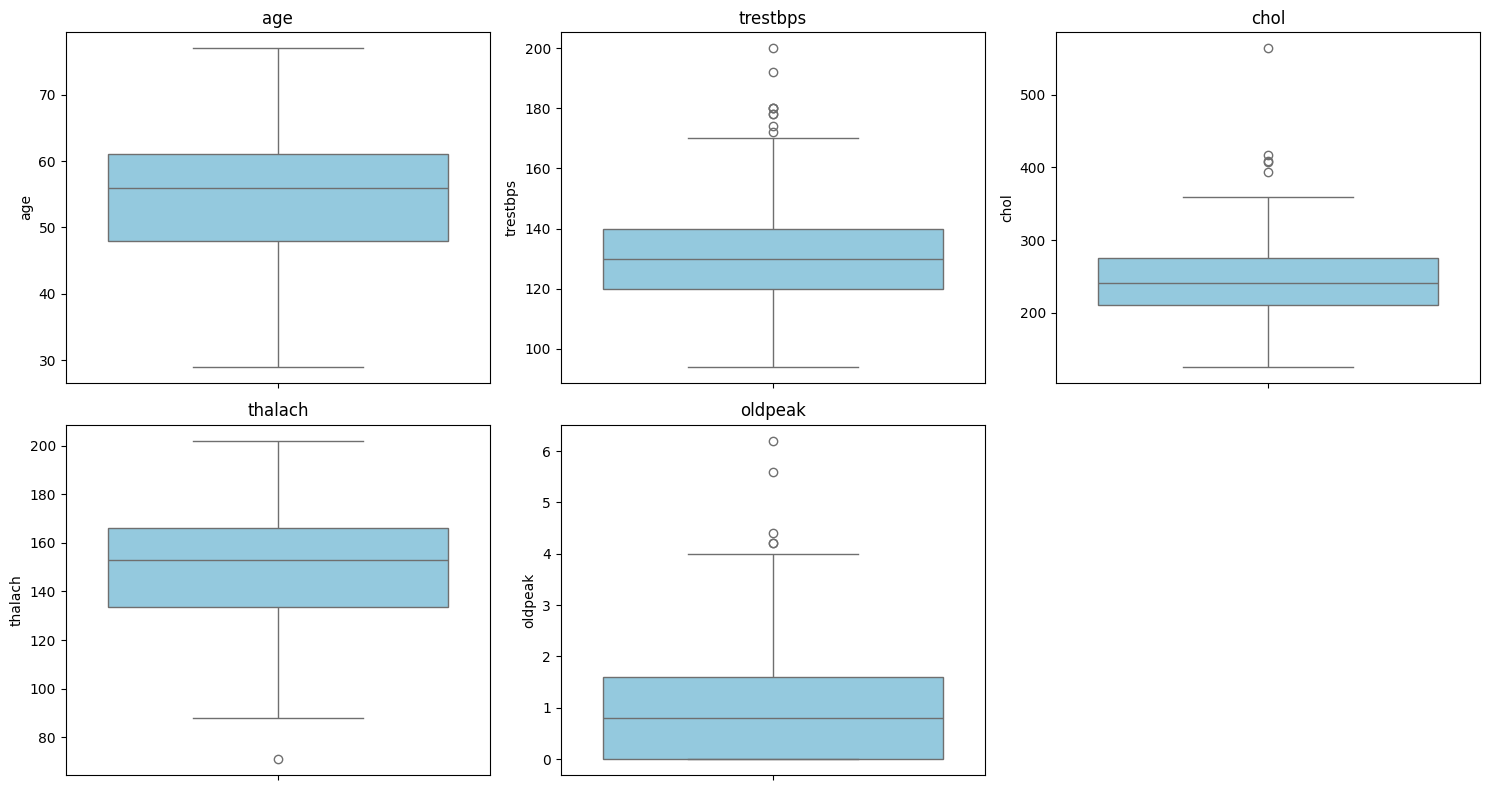

In [ ]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


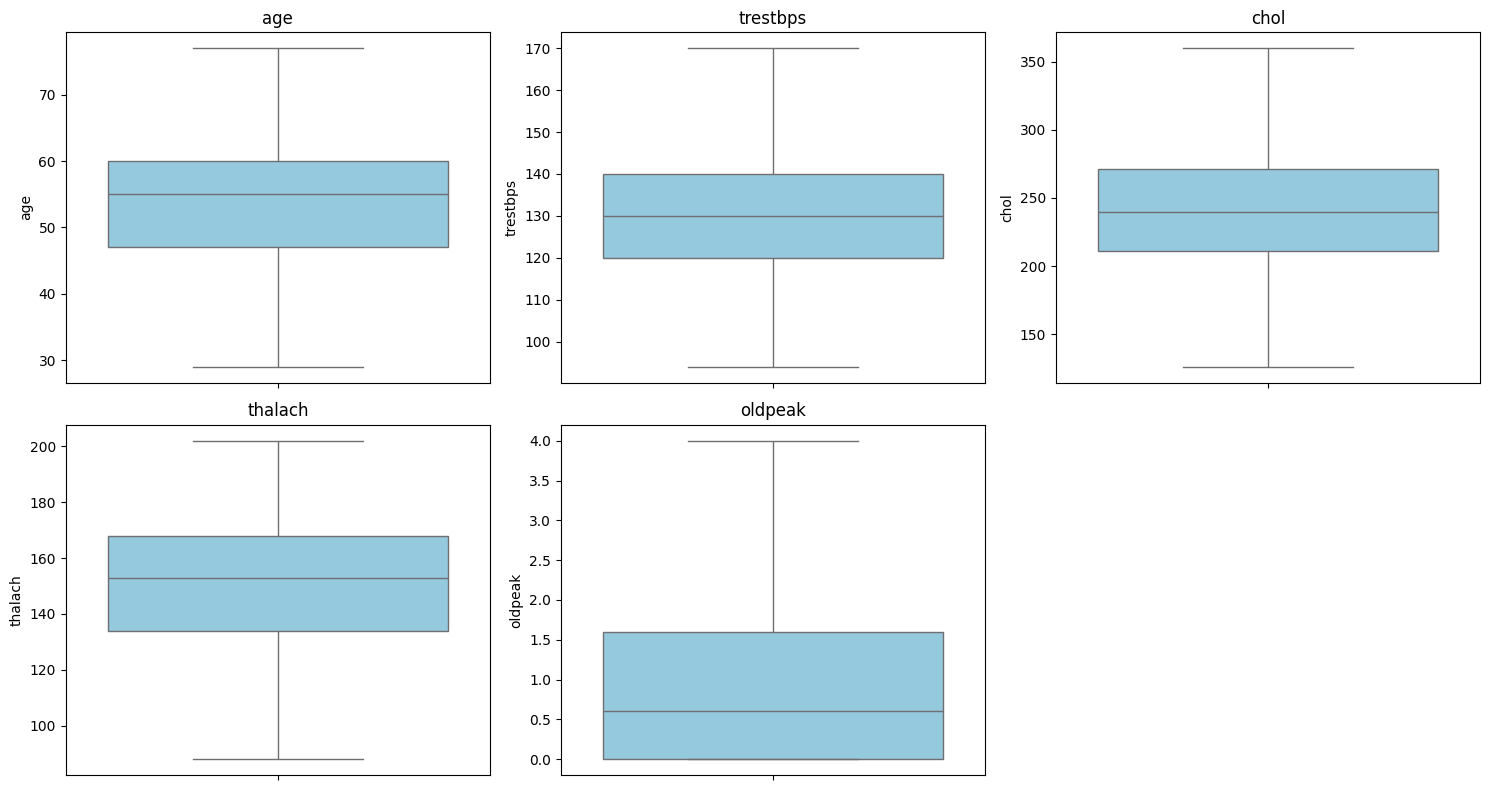

In [ ]:
df_clean = df.copy()
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()